In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.33 s (started: 2022-06-02 18:53:51 +00:00)


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 3.21 s (started: 2022-06-02 18:53:55 +00:00)


In [ ]:
import os #file
import zipfile #import dataset
import random #inisial
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import gradio as gr


from tensorflow.keras import models, layers
from tensorflow.keras import layers
from shutil import copyfile
from IPython.display import HTML

time: 4.16 ms (started: 2022-06-02 18:53:58 +00:00)


In [ ]:
#install tensorflow versi 2.8.0
!pip install -q tensorflow==2.8.0
print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.8.2
time: 3.11 s (started: 2022-06-02 18:53:58 +00:00)


In [ ]:
pip install tensorflow-gpu==2.8.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 3.01 s (started: 2022-06-02 18:54:01 +00:00)


In [ ]:
!wget --no-check-certificate \
    "https://github.com/gitbyandriani/Bangkit-Capstone-Project-C22-PS055/blob/main/BEEF.zip?raw=true"\
    -O "/tmp/BEEF.zip"

local_zip = "/tmp/BEEF.zip"
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-06-02 18:54:04--  https://github.com/gitbyandriani/Bangkit-Capstone-Project-C22-PS055/blob/main/BEEF.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/gitbyandriani/Bangkit-Capstone-Project-C22-PS055/raw/main/BEEF.zip [following]
--2022-06-02 18:54:04--  https://github.com/gitbyandriani/Bangkit-Capstone-Project-C22-PS055/raw/main/BEEF.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/gitbyandriani/Bangkit-Capstone-Project-C22-PS055/main/BEEF.zip [following]
--2022-06-02 18:54:04--  https://media.githubusercontent.com/media/gitbyandriani/Bangkit-Capstone-Project-C22-PS055/main/BEEF.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 225
CHANNELS=3
EPOCHS=50

time: 1.67 ms (started: 2022-06-02 18:54:16 +00:00)


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/tmp/BEEF",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3459 files belonging to 11 classes.
time: 211 ms (started: 2022-06-02 18:54:16 +00:00)


In [ ]:
class_names = dataset.class_names
class_names

['brisket',
 'chuck',
 'flank',
 'plate',
 'rib',
 'round',
 'rump',
 'shank',
 'short_loin',
 'sirloin',
 'tenderloin']

time: 4.69 ms (started: 2022-06-02 18:54:16 +00:00)


In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 225, 225, 3)
[ 5  1  1 10  8  2 10  8  7  9  9  2  1  9  2  9  8  2  4  0  8  4 10  9
  3  1  8  1  8  5  0  0]
time: 471 ms (started: 2022-06-02 18:54:16 +00:00)


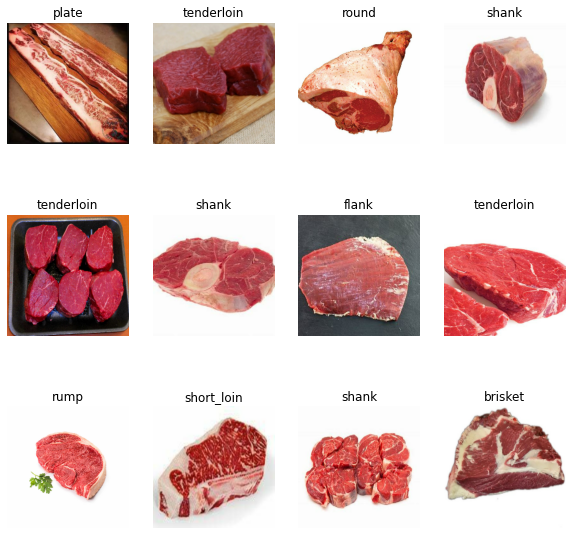

time: 879 ms (started: 2022-06-02 18:54:17 +00:00)


In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/tmp/BEEF",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMAGE_SIZE, IMAGE_SIZE),
  batch_size=BATCH_SIZE)


Found 3459 files belonging to 11 classes.
Using 2768 files for training.
time: 151 ms (started: 2022-06-02 18:54:17 +00:00)


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/tmp/BEEF",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMAGE_SIZE, IMAGE_SIZE),
  batch_size=BATCH_SIZE)


Found 3459 files belonging to 11 classes.
Using 691 files for validation.
time: 133 ms (started: 2022-06-02 18:54:18 +00:00)


In [ ]:
class_names = train_ds.class_names
print(class_names)


['brisket', 'chuck', 'flank', 'plate', 'rib', 'round', 'rump', 'shank', 'short_loin', 'sirloin', 'tenderloin']
time: 912 µs (started: 2022-06-02 18:54:18 +00:00)


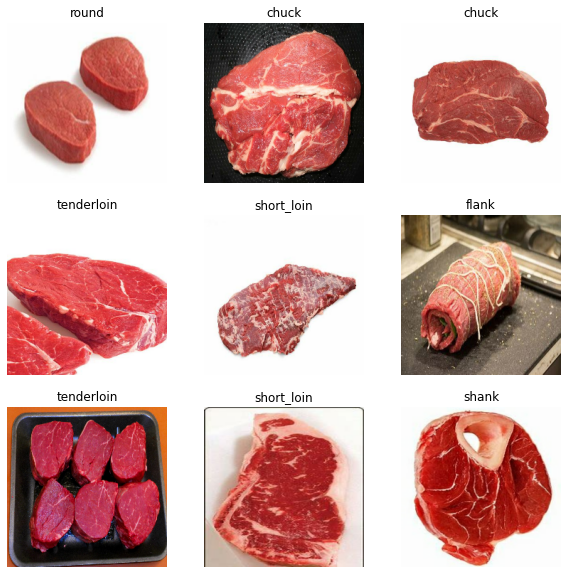

time: 857 ms (started: 2022-06-02 18:54:18 +00:00)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 225, 225, 3)
(32,)
time: 318 ms (started: 2022-06-02 18:54:19 +00:00)


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


time: 5.55 ms (started: 2022-06-02 18:54:19 +00:00)


In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

time: 13.7 ms (started: 2022-06-02 18:54:19 +00:00)


In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

time: 6.42 ms (started: 2022-06-02 18:54:19 +00:00)


In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

time: 296 ms (started: 2022-06-02 18:54:19 +00:00)


In [ ]:
def create_model():

  model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(225, 225, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 128 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(11, activation='softmax')
  ])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  return model



time: 9.17 ms (started: 2022-06-02 18:54:19 +00:00)


In [ ]:
model = create_model()

time: 80.6 ms (started: 2022-06-02 18:54:19 +00:00)


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 223, 223, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print('warnings ignored')

warnings ignored
time: 1.11 ms (started: 2022-06-02 18:54:19 +00:00)


In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=86,
)

Epoch 1/86
87/87 [==============================] - 25s 248ms/step - loss: 30.1995 - accuracy: 0.1015 - val_loss: 2.3816 - val_accuracy: 0.1085
Epoch 2/86
87/87 [==============================] - 21s 238ms/step - loss: 2.3800 - accuracy: 0.1239 - val_loss: 2.3865 - val_accuracy: 0.1201
Epoch 3/86
87/87 [==============================] - 21s 238ms/step - loss: 2.3774 - accuracy: 0.1304 - val_loss: 2.3705 - val_accuracy: 0.1172
Epoch 4/86
87/87 [==============================] - 21s 240ms/step - loss: 2.3703 - accuracy: 0.1185 - val_loss: 2.3653 - val_accuracy: 0.1013
Epoch 5/86
87/87 [==============================] - 21s 242ms/step - loss: 2.3535 - accuracy: 0.1351 - val_loss: 2.3365 - val_accuracy: 0.1259
Epoch 6/86
87/87 [==============================] - 21s 242ms/step - loss: 2.3521 - accuracy: 0.1315 - val_loss: 2.3481 - val_accuracy: 0.1245
Epoch 7/86
87/87 [==============================] - 21s 242ms/step - loss: 2.3340 - accuracy: 0.1478 - val_loss: 2.3234 - val_accuracy: 0.118

In [ ]:
scores = model.evaluate(val_ds)

22/22 [==============================] - 1s 35ms/step - loss: 1.0552 - accuracy: 0.6889
time: 789 ms (started: 2022-06-02 19:25:04 +00:00)


In [ ]:
scores

[1.055168867111206, 0.6888567209243774]

time: 3.86 ms (started: 2022-06-02 19:25:05 +00:00)


In [ ]:
history

time: 4 ms (started: 2022-06-02 19:25:05 +00:00)


In [ ]:
history.params

{'epochs': 86, 'steps': 87, 'verbose': 1}

time: 3.15 ms (started: 2022-06-02 19:25:05 +00:00)


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

time: 3.75 ms (started: 2022-06-02 19:25:05 +00:00)


In [ ]:
type(history.history['loss'])

list

time: 3.44 ms (started: 2022-06-02 19:25:05 +00:00)


In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[30.19950294494629,
 2.380021810531616,
 2.3773744106292725,
 2.370255470275879,
 2.353527545928955]

time: 3.5 ms (started: 2022-06-02 19:25:05 +00:00)


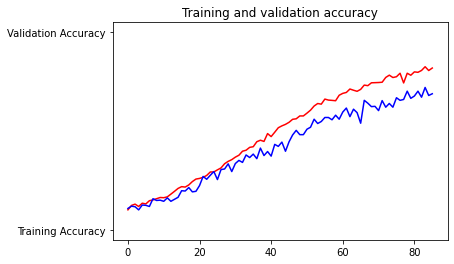

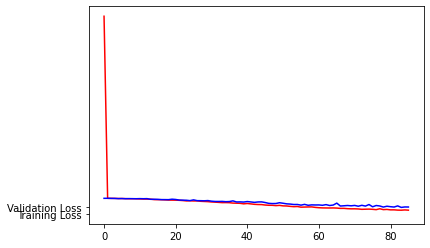

time: 199 ms (started: 2022-06-02 19:25:05 +00:00)


In [ ]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

first image to predict
actual label: rib
predicted label: rib


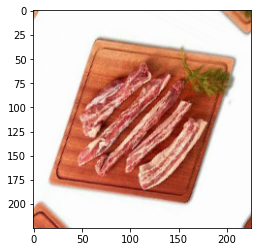

time: 615 ms (started: 2022-06-02 19:25:05 +00:00)


In [ ]:
import numpy as np
for images_batch, labels_batch in train_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

time: 4.58 ms (started: 2022-06-02 19:25:06 +00:00)


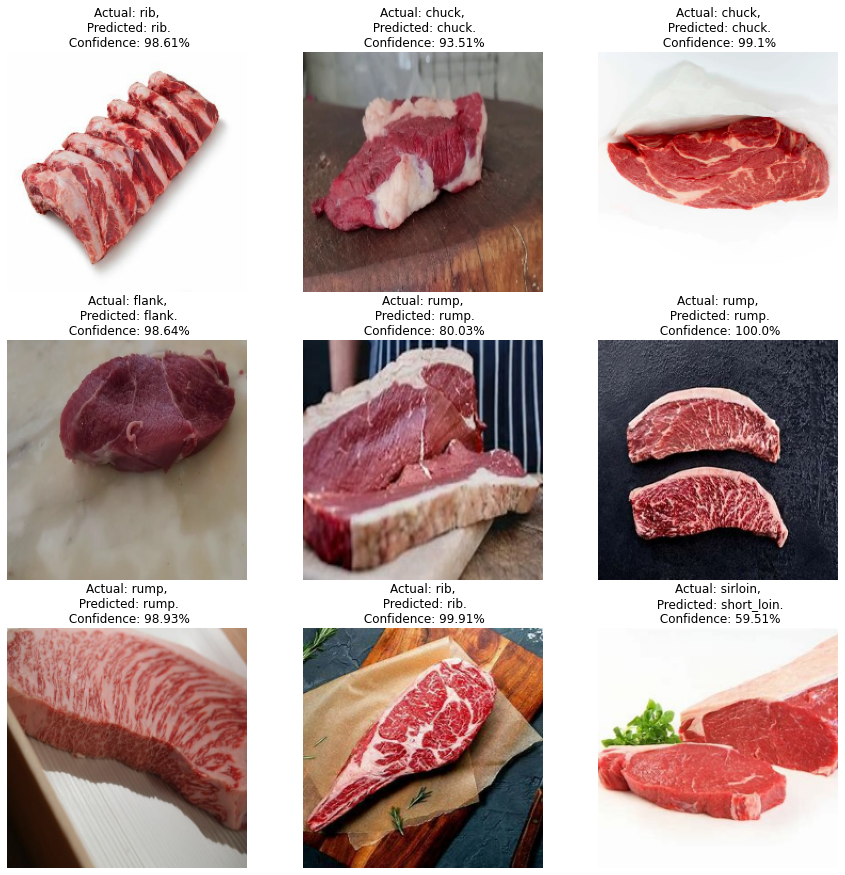

time: 2.18 s (started: 2022-06-02 19:25:06 +00:00)


In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
to_create = [
    '/content/sample_data/saved_model/',
    '/content/sample_data/saved_model/1',
    '/content/sample_data/saved_model/2']
for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')


/content/sample_data/saved_model/ failed
/content/sample_data/saved_model/1 failed
/content/sample_data/saved_model/2 failed
time: 2.86 ms (started: 2022-06-02 19:25:08 +00:00)


In [ ]:
import os
max([int(i) for i in os.listdir("../content/sample_data/saved_model") + [0]])+1

3

time: 3.56 ms (started: 2022-06-02 19:25:08 +00:00)


In [ ]:
import os
model_version=max([int(i) for i in os.listdir("../content/sample_data/saved_model") + [0]])+1
model.save(f"../content/sample_data/saved_model{model_version}")

INFO:tensorflow:Assets written to: ../content/sample_data/saved_model3/assets
time: 1.16 s (started: 2022-06-02 19:25:08 +00:00)


In [ ]:
model.save("beef_cut.h5")

time: 195 ms (started: 2022-06-02 19:25:09 +00:00)


In [ ]:
from keras.models import load_model
# save model
model.save_weights('beef_weight.h5')
print('Model Saved!')
 
# load model
savedModel = model.load_weights('beef_weight.h5')
print('Model Loaded!')



Model Saved!
Model Loaded!
time: 75.3 ms (started: 2022-06-02 19:25:09 +00:00)


In [ ]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 7.71 ms (started: 2022-06-02 19:25:09 +00:00)


In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,225,225,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(11)}

time: 1.98 ms (started: 2022-06-02 19:25:09 +00:00)


In [ ]:
import gradio as gr

time: 752 µs (started: 2022-06-02 19:25:09 +00:00)


In [ ]:
image = gr.inputs.Image(shape=(225,225))
label = gr.outputs.Label(num_top_classes=11)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://55484.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install colabcode
!pip install fastapi

In [ ]:
from colabcode import ColabCode
from fastapi import FastAPI

In [ ]:
cc = ColabCode(port=12000, code=False)


In [ ]:
app = FastAPI()

@app.get("/")
async def read_root():
  return {"Hello": "World"}

In [ ]:
cc.run_app(app=app)

Public URL: NgrokTunnel: "https://1164-35-188-185-168.ngrok.io" -> "http://localhost:12000"


INFO:     Started server process [179]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)


In [ ]:
import os #file
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf









In [ ]:
%writefile models.py
from pydantie import BaseModel, conlist
from typing import List

class beef(BaseModel):
  data List(conlist(float, min_items=4, max_items=4)]